In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [6]:
n = 100

In [7]:
# base algorithm

with open('../../01_base/results-base-2.pickle', 'rb') as f:
    results = pickle.load(f)

# predicted = results['predicted']
# true = results['true']
predicted = results['predicted'][:, :n]
true = results['true'][:, :n]

In [8]:
# gradboost

with open('../04_run_algorithms/results-w-new-gradboost.pickle', 'rb') as f:
    predicted_gradboost = pickle.load(f)

# predicted_gradboost = predicted_gradboost
predicted_gradboost = predicted_gradboost[:, :n]

In [9]:
# knn

with open('../04_run_algorithms/results-w-new-knn.pickle', 'rb') as f:
    predicted_knn = pickle.load(f)

# predicted_knn = predicted_knn
predicted_knn = predicted_knn[:, :n]

In [10]:
# logreg

with open('../04_run_algorithms/results-w-new-logreg.pickle', 'rb') as f:
    predicted_logreg = pickle.load(f)

# predicted_logreg = predicted_logreg
predicted_logreg = predicted_logreg[:, :n]

In [11]:
# mlp

with open('../04_run_algorithms/results-w-new-mlp.pickle', 'rb') as f:
    predicted_mlp = pickle.load(f)

# predicted_mlp = predicted_mlp
predicted_mlp = predicted_mlp[:, :n]

In [12]:
# svc

with open('../04_run_algorithms/results-w-new-svc.pickle', 'rb') as f:
    predicted_svc = pickle.load(f)

# predicted_svc = predicted_svc
predicted_svc = predicted_svc[:, :n]

## Metrics

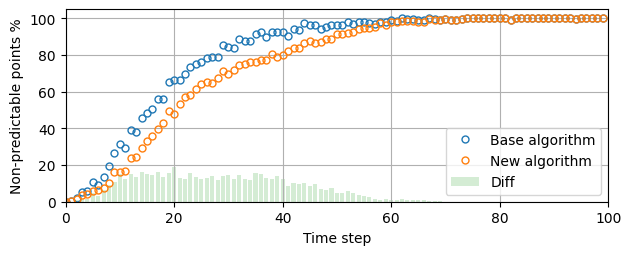

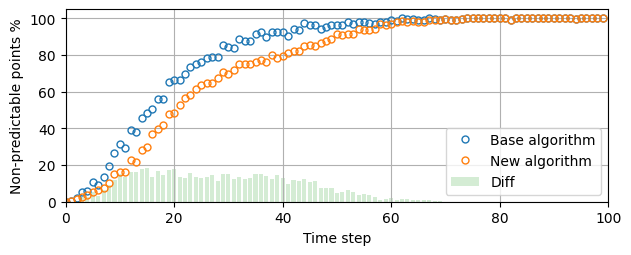

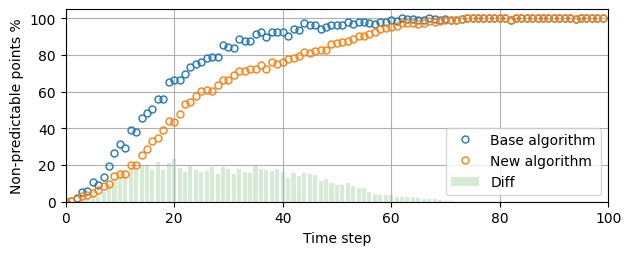

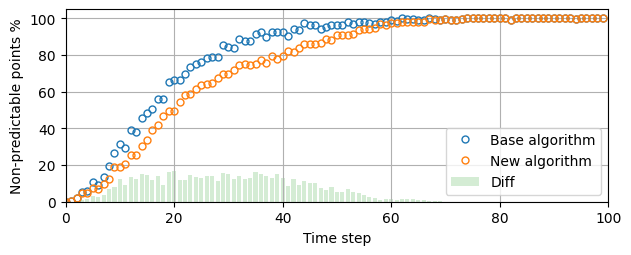

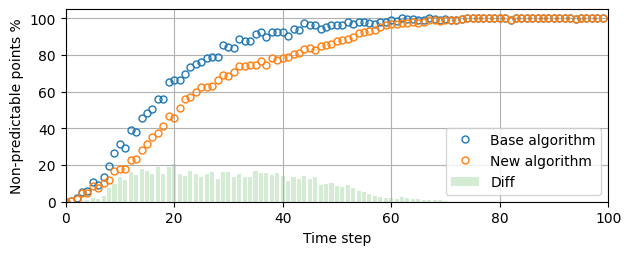

In [13]:
base = get_non_predictable_points_percent(predicted)
gradboost = get_non_predictable_points_percent(predicted_gradboost)
knn = get_non_predictable_points_percent(predicted_knn)
logreg = get_non_predictable_points_percent(predicted_logreg)
mlp = get_non_predictable_points_percent(predicted_mlp)
svc = get_non_predictable_points_percent(predicted_svc)

models = [
    ('Experiment #6. Wishart motifs. Gradient boosting classifier.', gradboost, 'lorenz_wishart_grad_nonpred.pdf'),
    ('Experiment #7. Wishart motifs. KNN classifier.', knn, 'lorenz_wishart_knn_nonpred.pdf'),
    ('Experiment #8. Wishart motifs. Logistic regression classifier.', logreg, 'lorenz_wishart_log_nonpred.pdf'),
    ('Experiment #9. Wishart motifs. MLP classifier.', mlp, 'lorenz_wishart_mlp_nonpred.pdf'),
    ('Experiment #10. Wishart motifs. SVM classifier.', svc, 'lorenz_wishart_svm_nonpred.pdf')
]

diff_labels = [
    'Wishart Gradient boosting',
    'Wishart KNN',
    'Wishart Logistic regression',
    'Wishart MLP',
    'Wishart SVM'
]
diffs = []

for label, model, file_name in models:
    diffs.append(np.sum(base - model))
    plt.figure(figsize=[7, 2.5])
    plt.bar(range(n), base - model, color='#2ca02c', width=0.75, label='Diff', alpha=0.2)
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base algorithm')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New algorithm')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('Non-predictable points %')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

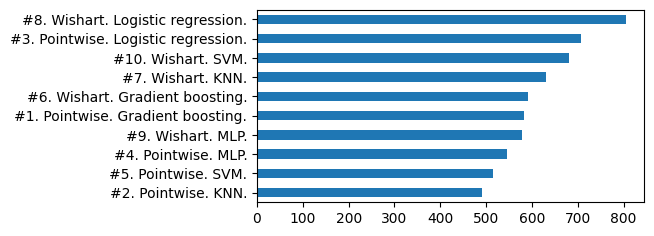

In [14]:
diffs_all = [
    581.9444444444445,
    490.2777777777777,
    706.5972222222222,
    544.7916666666666,
    514.5833333333334,
    590.9722222222222,
    630.5555555555555,
    805.2083333333335,
    577.7777777777778,
    681.25
]

diff_labels_all = [
    '#1. Pointwise. Gradient boosting.',
    '#2. Pointwise. KNN.',
    '#3. Pointwise. Logistic regression.',
    '#4. Pointwise. MLP.',
    '#5. Pointwise. SVM.',
    '#6. Wishart. Gradient boosting.',
    '#7. Wishart. KNN.',
    '#8. Wishart. Logistic regression.',
    '#9. Wishart. MLP.',
    '#10. Wishart. SVM.',
]

pd.DataFrame(diffs_all, index=diff_labels_all) \
    .sort_values(by=0, ascending=True) \
    .plot.barh(figsize=[5, 2.5], legend=False)
# plt.title('')
plt.show()

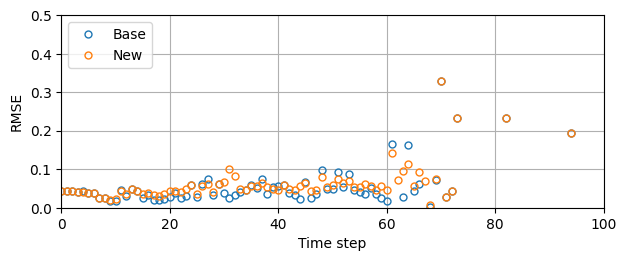

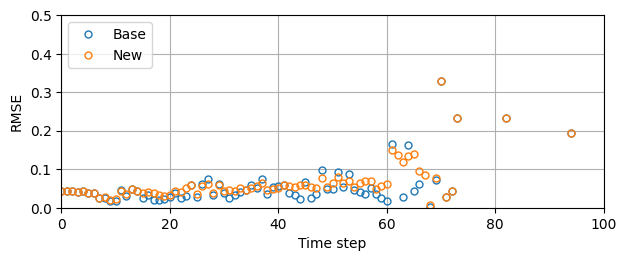

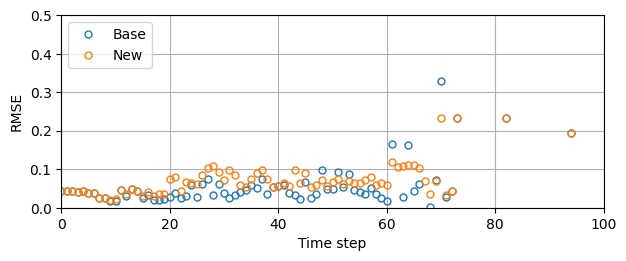

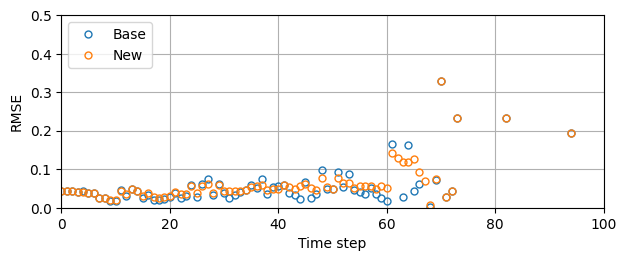

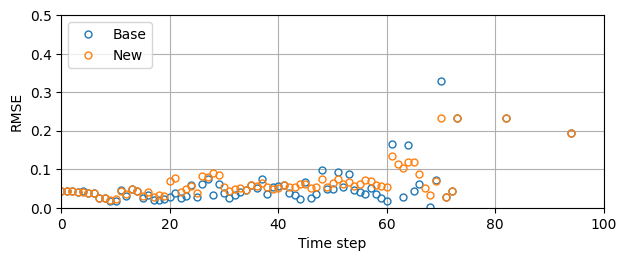

In [15]:
base = get_rmse(true, predicted)
gradboost = get_rmse(true, predicted_gradboost)
knn = get_rmse(true, predicted_knn)
logreg = get_rmse(true, predicted_logreg)
mlp = get_rmse(true, predicted_mlp)
svc = get_rmse(true, predicted_svc)

models = [
    ('#6. Wishart. Gradient boosting.', gradboost, 'lorenz_wishart_grad_rmse.pdf'),
    ('#7. Wishart. KNN.', knn, 'lorenz_wishart_knn_rmse.pdf'),
    ('#8. Wishart. Logistic regression.', logreg, 'lorenz_wishart_log_rmse.pdf'),
    ('#9. Wishart. MLP.', mlp, 'lorenz_wishart_mlp_rmse.pdf'),
    ('#10. Wishart. SVM.', svc, 'lorenz_wishart_svm_rmse.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=0.5)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

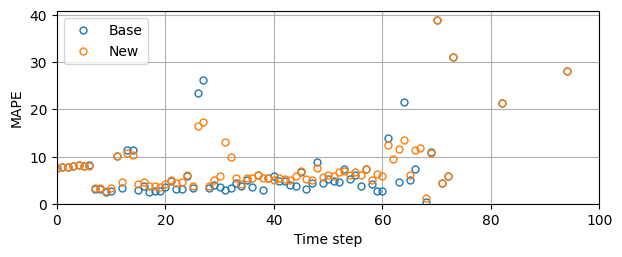

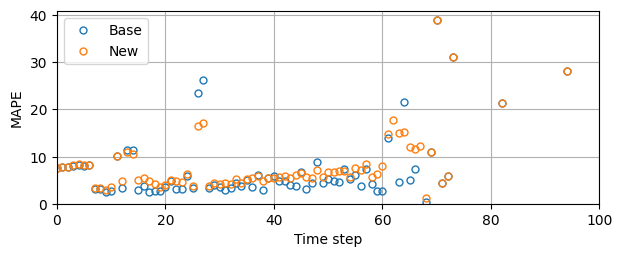

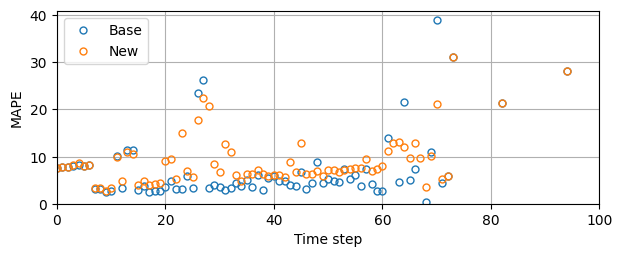

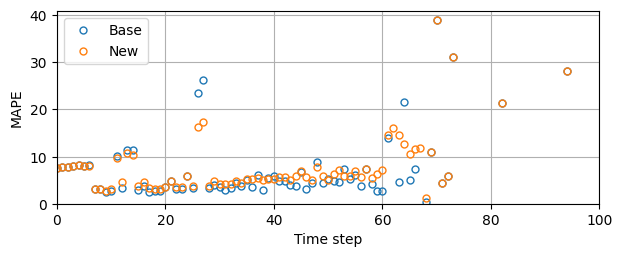

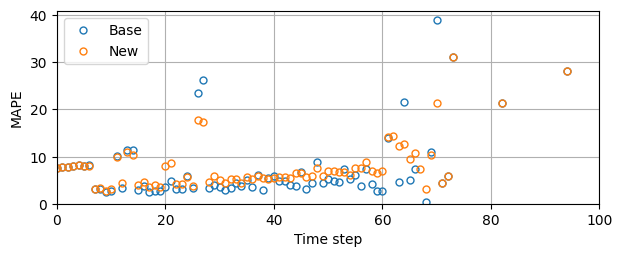

In [16]:
base = get_mape(true, predicted)
gradboost = get_mape(true, predicted_gradboost)
knn = get_mape(true, predicted_knn)
logreg = get_mape(true, predicted_logreg)
mlp = get_mape(true, predicted_mlp)
svc = get_mape(true, predicted_svc)

models = [
    ('#6. Wishart. Gradient boosting.', gradboost, 'lorenz_wishart_grad_mape.pdf'),
    ('#7. Wishart. KNN.', knn, 'lorenz_wishart_knn_mape.pdf'),
    ('#8. Wishart. Logistic regression.', logreg, 'lorenz_wishart_log_mape.pdf'),
    ('#9. Wishart. MLP.', mlp, 'lorenz_wishart_mlp_mape.pdf'),
    ('#10. Wishart. SVM.', svc, 'lorenz_wishart_svm_mape.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('MAPE')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

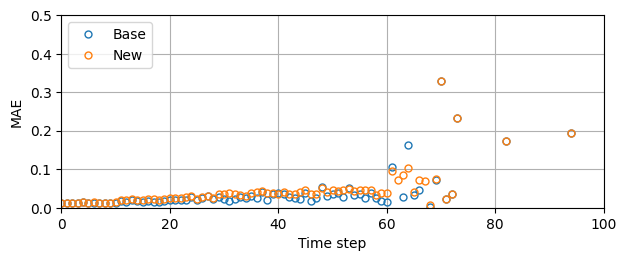

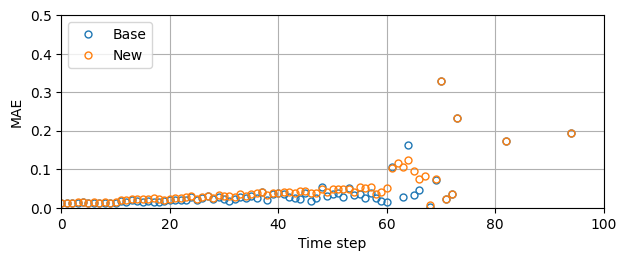

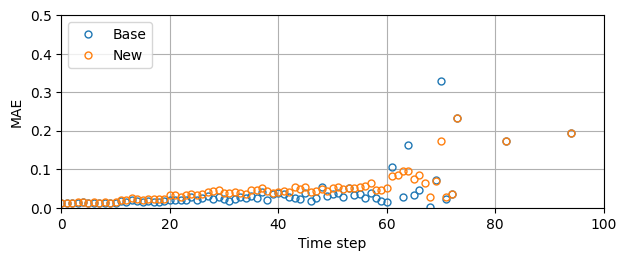

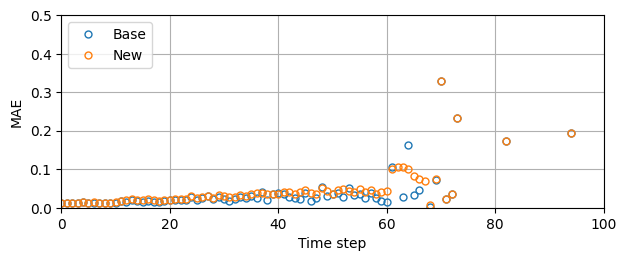

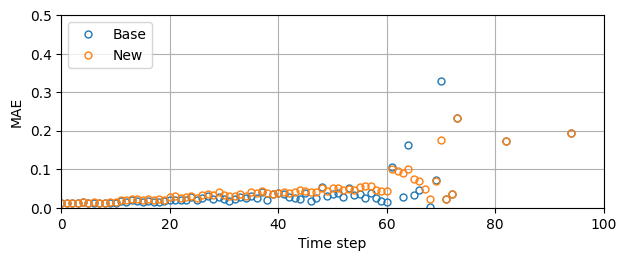

In [17]:
base = get_mae(true, predicted)
gradboost = get_mae(true, predicted_gradboost)
knn = get_mae(true, predicted_knn)
logreg = get_mae(true, predicted_logreg)
mlp = get_mae(true, predicted_mlp)
svc = get_mae(true, predicted_svc)

models = [
    ('#6. Wishart. Gradient boosting.', gradboost, 'lorenz_wishart_grad_mae.pdf'),
    ('#7. Wishart. KNN.', knn, 'lorenz_wishart_knn_mae.pdf'),
    ('#8. Wishart. Logistic regression.', logreg, 'lorenz_wishart_log_mae.pdf'),
    ('#9. Wishart. MLP.', mlp, 'lorenz_wishart_mlp_mae.pdf'),
    ('#10. Wishart. SVM.', svc, 'lorenz_wishart_svm_mae.pdf')
]

for label, model, file_name in models:
    plt.figure(figsize=[7, 2.5])
    plt.plot(base, marker='o', markersize=5, linestyle='', color='#1f77b4', mfc='none', label='Base')
    plt.plot(model, marker='o', markersize=5, linestyle='', color='#ff7f0e', mfc='none', label='New')
    plt.xlim(left=0, right=n)
    plt.ylim(bottom=0, top=0.5)
    # plt.title(label)
    plt.xlabel('Time step')
    plt.ylabel('MAE')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()